In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

from skimage import measure
from skimage.draw import ellipsoid
import cactas as C
import nrrd

2024-08-28 17:14:09.503720: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
DATAPATH1 = '/raid/mpsych/CACTAS/DATA/CA_CEA4/'
DATAPATH2 = '/raid/mpsych/CACTAS/DATA/CA_CEA5/'

In [3]:
DATAPATHS = [DATAPATH1, DATAPATH2]

In [4]:
TITLES = ["original threshold", "-50 threshold"]

In [5]:
segs = [C.Helper.load_seg_data(DATAPATH) for DATAPATH in DATAPATHS]

13.ca.seg.nrrd from original threshold
13.ca.seg.nrrd from -50 threshold


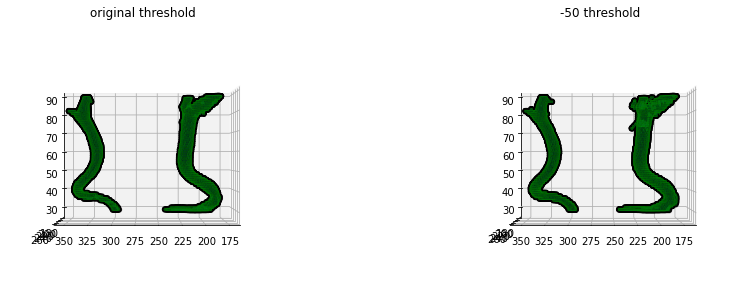

55.ca.seg.nrrd from original threshold
55.ca.seg.nrrd from -50 threshold


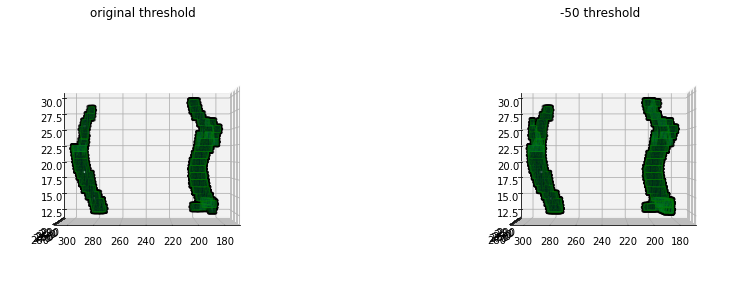

60.ca.seg.nrrd from original threshold
60.ca.seg.nrrd from -50 threshold


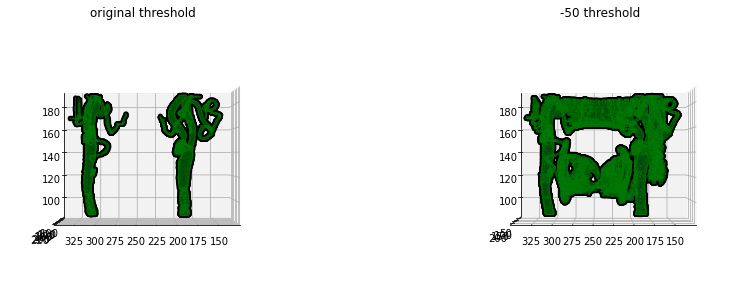

8.ca.seg.nrrd from original threshold
8.ca.seg.nrrd from -50 threshold


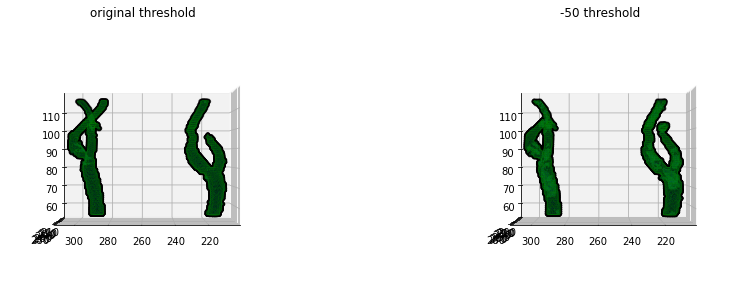

50.ca.seg.nrrd from original threshold
50.ca.seg.nrrd from -50 threshold


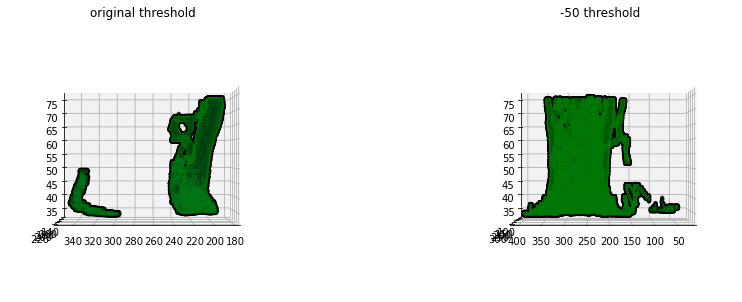

39.ca.seg.nrrd from original threshold
39.ca.seg.nrrd from -50 threshold


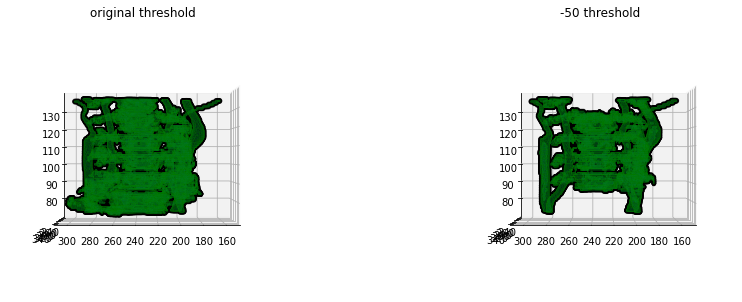

74.ca.seg.nrrd from original threshold
74.ca.seg.nrrd from -50 threshold


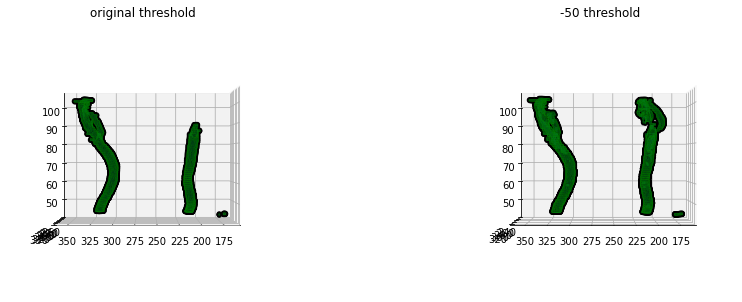

66.ca.seg.nrrd from original threshold
66.ca.seg.nrrd from -50 threshold


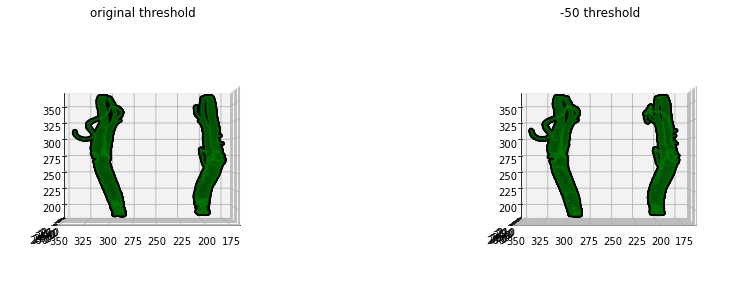

71.ca.seg.nrrd from original threshold
71.ca.seg.nrrd from -50 threshold


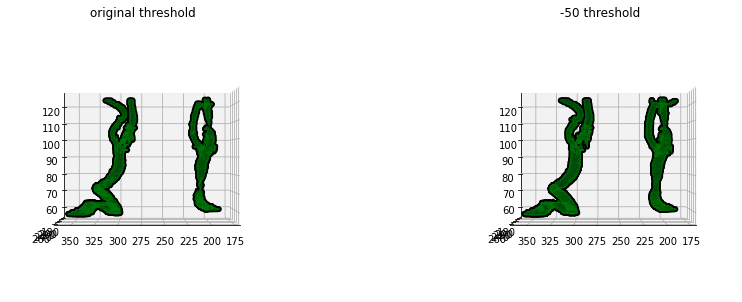

76.ca.seg.nrrd from original threshold
76.ca.seg.nrrd from -50 threshold


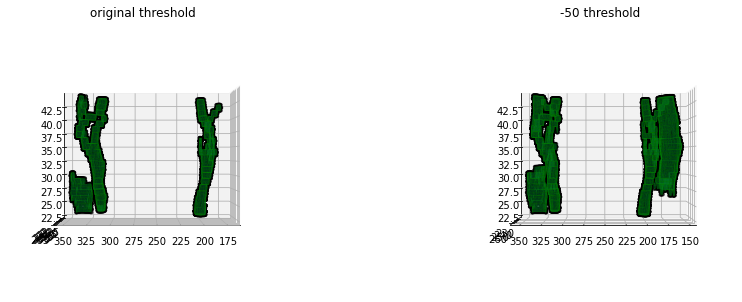

42.ca.seg.nrrd from original threshold
42.ca.seg.nrrd from -50 threshold


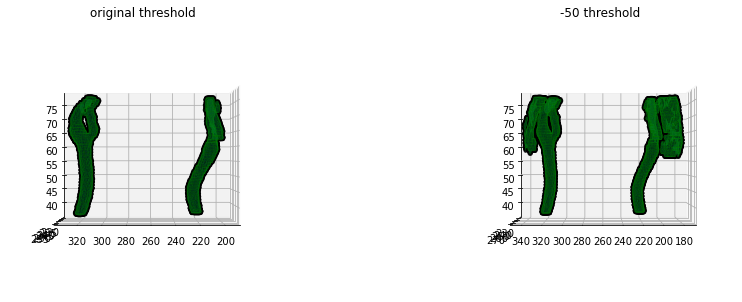

73.ca.seg.nrrd from original threshold
73.ca.seg.nrrd from -50 threshold


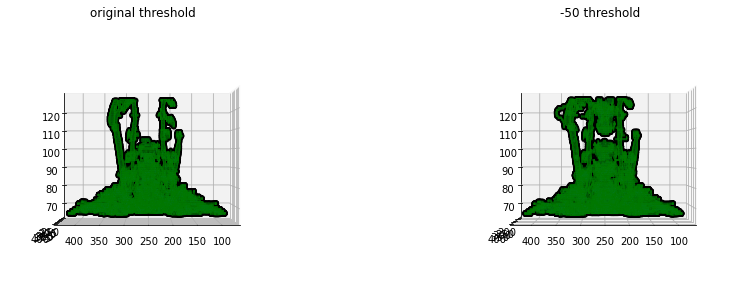

53.ca.seg.nrrd from original threshold
53.ca.seg.nrrd from -50 threshold


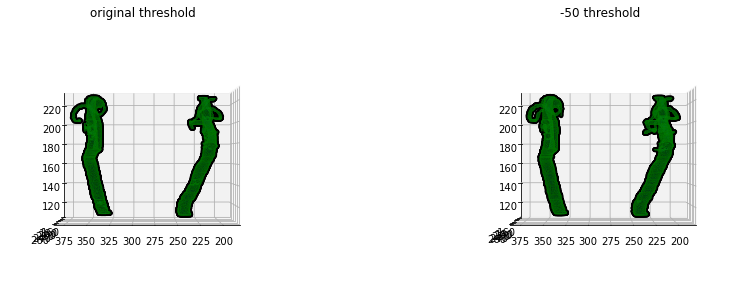

65.ca.seg.nrrd from original threshold
65.ca.seg.nrrd from -50 threshold


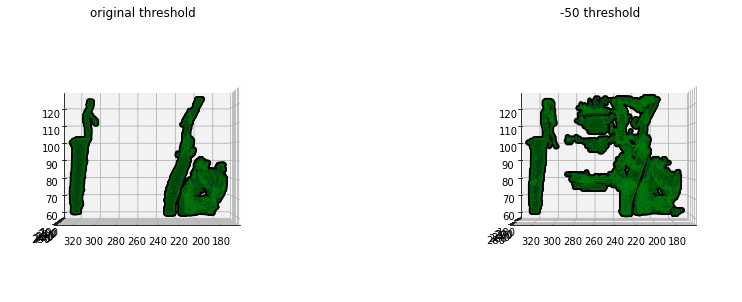

64.ca.seg.nrrd from original threshold
64.ca.seg.nrrd from -50 threshold


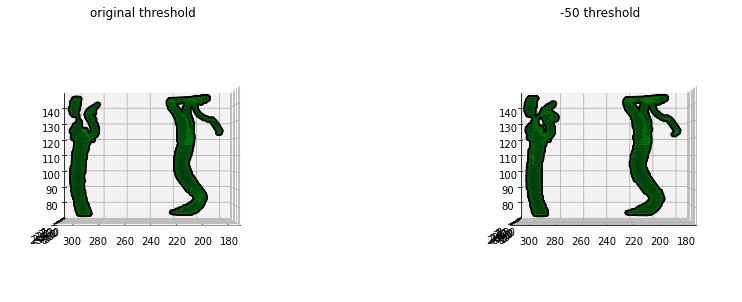

84.ca.seg.nrrd from original threshold
84.ca.seg.nrrd from -50 threshold


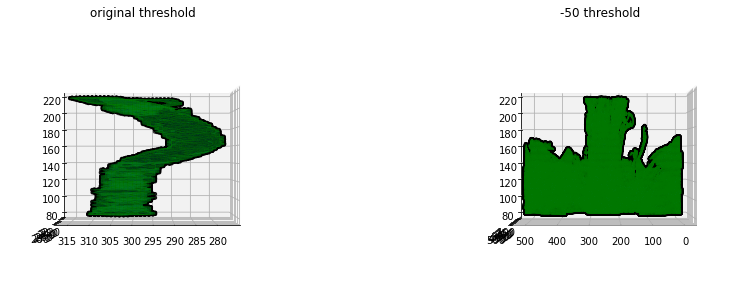

75.ca.seg.nrrd from original threshold
75.ca.seg.nrrd from -50 threshold


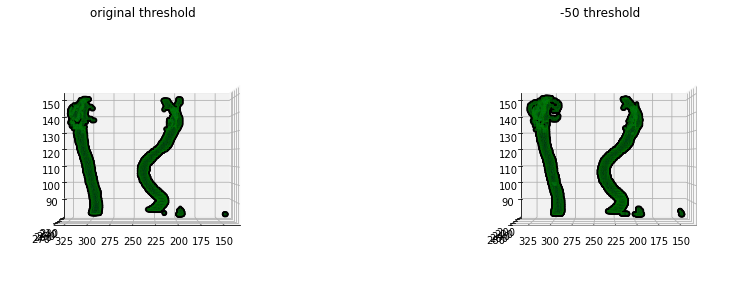

83.ca.seg.nrrd from original threshold
83.ca.seg.nrrd from -50 threshold


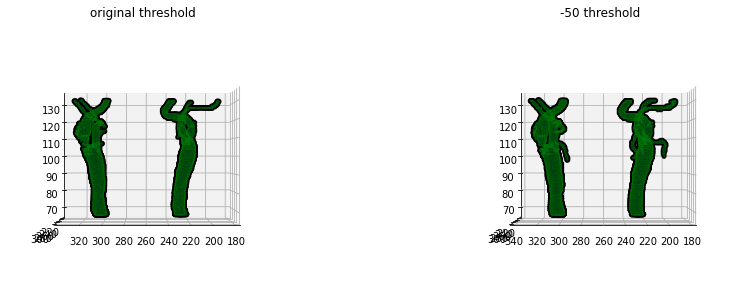

41.ca.seg.nrrd from original threshold
41.ca.seg.nrrd from -50 threshold


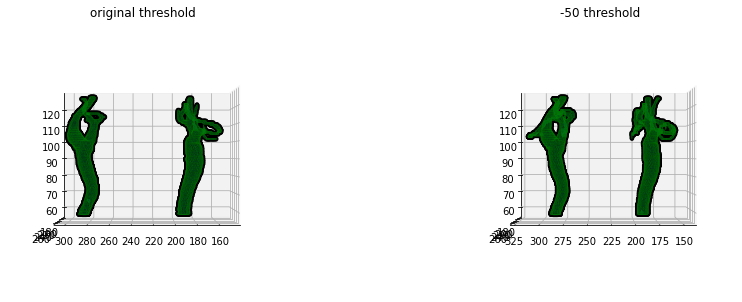

69.ca.seg.nrrd from original threshold
69.ca.seg.nrrd from -50 threshold


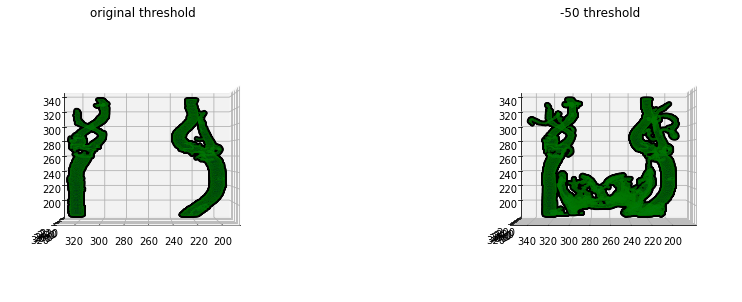

79.ca.seg.nrrd from original threshold
79.ca.seg.nrrd from -50 threshold


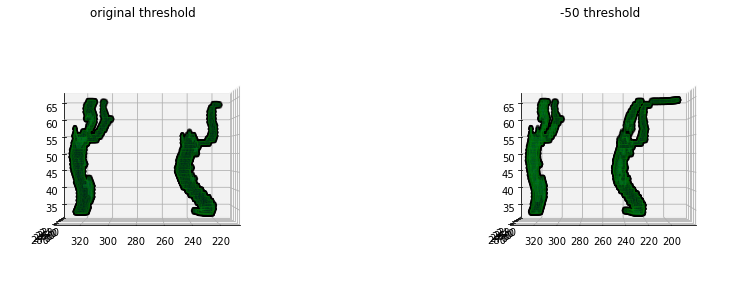

82.ca.seg.nrrd from original threshold
82.ca.seg.nrrd from -50 threshold


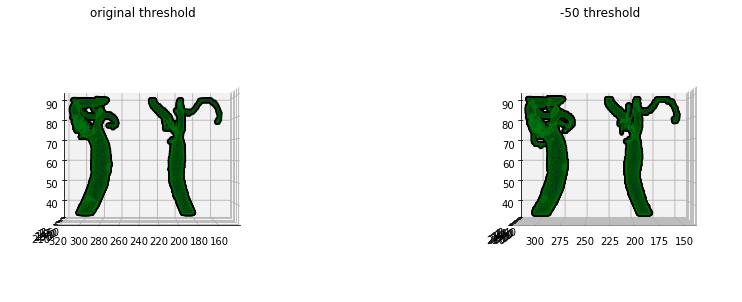

23.ca.seg.nrrd from original threshold
23.ca.seg.nrrd from -50 threshold


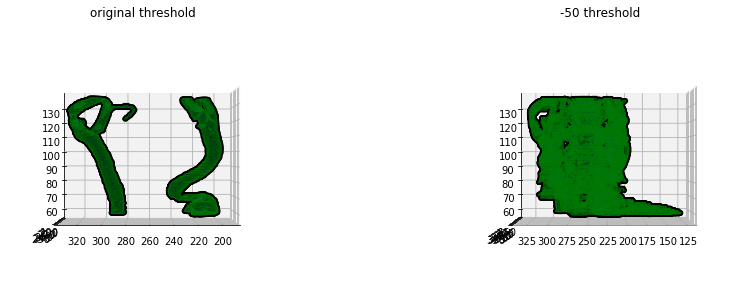

27.ca.seg.nrrd from original threshold
27.ca.seg.nrrd from -50 threshold


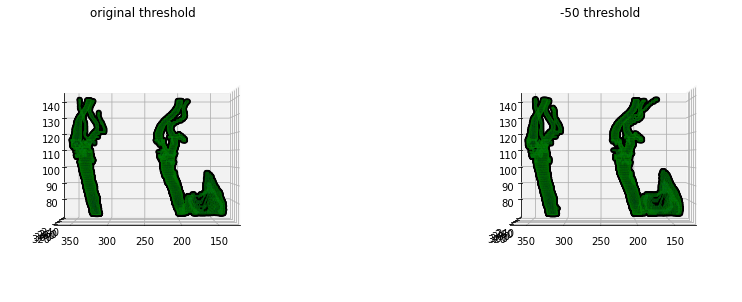

32.ca.seg.nrrd from original threshold
32.ca.seg.nrrd from -50 threshold


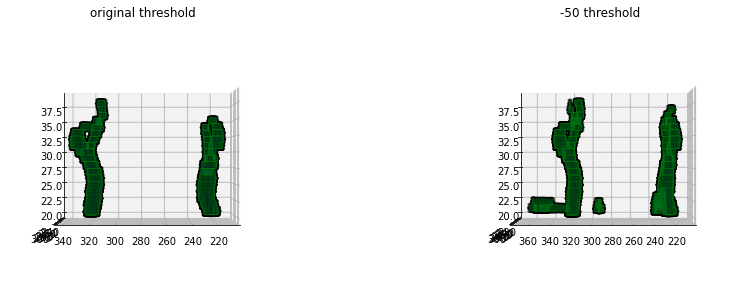

15.ca.seg.nrrd from original threshold
15.ca.seg.nrrd from -50 threshold


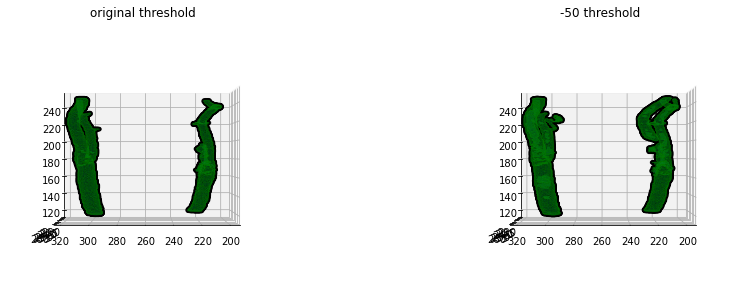

In [6]:
for i in range(len(segs[0])):
    fig = plt.figure(figsize=(15, 5))

    for j, seg_list in enumerate(segs):
        d = DATAPATHS[j] + seg_list[i]
        data, header = nrrd.read(d)
        
        min_val, max_val = data.min(), data.max()
        isovalue = (min_val + max_val) / 2
        
        if isovalue != 0:
            vertices, faces, normals, values = measure.marching_cubes(data, isovalue)
            print(f"{seg_list[i]} from {TITLES[j]}")

            ax = fig.add_subplot(1, len(DATAPATHS), j+1, projection='3d')

            ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', s=10)
            mesh = Poly3DCollection(vertices[faces], linewidths=0.05, edgecolors='green', alpha=0.1)
            ax.add_collection3d(mesh)
            
            ax.view_init(elev=0, azim=90)
            ax.set_title(TITLES[j])

    plt.show()